<a href="https://colab.research.google.com/github/MichaelMendonca/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Mike_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Reproduce another example
import pandas as pd

df = pd.read_csv('https://projects.fivethirtyeight.com/mlb-api/mlb_elo.csv')

In [0]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2019-10-30,2019,0,w,HOU,WSN,1599.542804,1584.363378,0.574617,0.425383,1594.882297,1589.023885,1591.026009,1580.329587,Zack Greinke,Max Scherzer,56.920649,61.723620,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
1,2019-10-29,2019,0,w,HOU,WSN,1605.069000,1578.837182,0.595209,0.404791,1599.542804,1584.363378,1595.165625,1576.189971,Justin Verlander,Stephen Strasburg,62.975093,60.272516,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2,2019-10-27,2019,0,w,WSN,HOU,1584.005206,1599.900976,0.515546,0.484454,1578.837182,1605.069000,1578.722119,1592.633477,Joe Ross,Gerrit Cole,49.433198,66.891460,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
3,2019-10-26,2019,0,w,WSN,HOU,1589.985555,1593.920627,0.538425,0.461575,1584.005206,1599.900976,1583.715416,1587.640180,Patrick Corbin,Jose Urquidy,56.003581,51.251046,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
4,2019-10-25,2019,0,w,WSN,HOU,1593.827376,1590.078806,0.553044,0.446956,1589.985555,1593.920627,1586.428733,1584.926863,Anibal Sanchez,Zack Greinke,54.036365,57.096801,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4


In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df.set_index('date', inplace=True)

In [0]:
df.head()

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-30,2019,0,w,HOU,WSN,1599.542804,1584.363378,0.574617,0.425383,1594.882297,1589.023885,1591.026009,1580.329587,Zack Greinke,Max Scherzer,56.920649,61.723620,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
2019-10-29,2019,0,w,HOU,WSN,1605.069000,1578.837182,0.595209,0.404791,1599.542804,1584.363378,1595.165625,1576.189971,Justin Verlander,Stephen Strasburg,62.975093,60.272516,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2019-10-27,2019,0,w,WSN,HOU,1584.005206,1599.900976,0.515546,0.484454,1578.837182,1605.069000,1578.722119,1592.633477,Joe Ross,Gerrit Cole,49.433198,66.891460,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
2019-10-26,2019,0,w,WSN,HOU,1589.985555,1593.920627,0.538425,0.461575,1584.005206,1599.900976,1583.715416,1587.640180,Patrick Corbin,Jose Urquidy,56.003581,51.251046,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
2019-10-25,2019,0,w,WSN,HOU,1593.827376,1590.078806,0.553044,0.446956,1589.985555,1593.920627,1586.428733,1584.926863,Anibal Sanchez,Zack Greinke,54.036365,57.096801,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4


In [0]:
lastday = df['2019-10-30']

In [0]:
final = lastday.tail(1)
final.T

date,2019-10-30
season,2019
neutral,0
playoff,w
team1,HOU
team2,WSN
elo1_pre,1599.54
elo2_pre,1584.36
elo_prob1,0.574617
elo_prob2,0.425383
elo1_post,1594.88


In [0]:
pct_columns = ['score1', 'score2']
final[pct_columns].T

date,2019-10-30
score1,2
score2,6


In [0]:
plot_data = final[pct_columns].T
plot_data.index = range(1,3)
plot_data.columns = ['score']
plot_data

,score
1,2
2,6


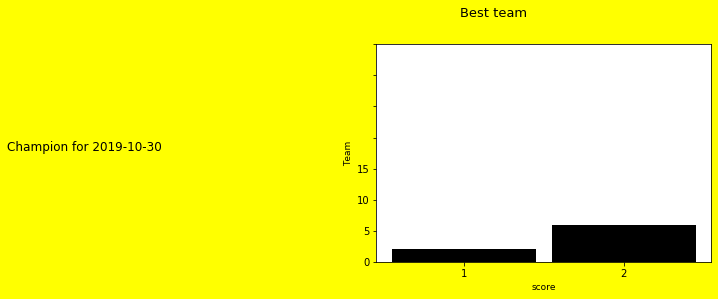

In [0]:
fig, ax = plt.subplots()

fig.patch.set(facecolor="yellow")

ax.bar(x=range(1,3), height=plot_data['score'], width=0.9, color="black")

ax.set(facecolor="white")

ax.set_title("Best team",
             fontsize=13,
             x=.35,
             y=1.1,
             fontweight='normal')
ax.text(s="Champion for 2019-10-30", fontsize=12, x=-1.85, y=18)

ax.set_xlabel("score", fontsize=9)
ax.set_ylabel("Team", fontsize=9)

ax.set_xticklabels(range(1,3), rotation=0)
ax.set_xticks(range(1,3))
ax.set_yticklabels(range(0,20,5))
ax.set_yticks(range(0,40,5));


# Try to start new one

In [0]:
# Step 2: Reproduce another example from FiveThityEight's shared data repository
# Here is the table I've picked. https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png?w=1150
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=1150'
example = Image(url=url, width=400)
display(example)

In [0]:
# I used this site to determine the red: https://html-color-codes.info/colors-from-image/?imageLoader=# which was #FF2700
#fake.plot.barh(width=0.9, color="#FF2700");
plt.style.available
plt.style.use('fivethirtyeight')

In [5]:
#putting a hold on working with the raw data per Mike. 
df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/drug-use-by-age/drug-use-by-age.csv')
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [7]:
#Creating my fake date
fakedata2 = {'Drugs': ['Marijuana', 'Pain reliever', 'Tranquilizer', 'Cocaine', 'Crack', 'OxyContin', 'Stimulant', 'Hallucinogen', 'Sedative', 'Inhalent', 'Meth', 'Heroin'], 
        '50-64PctUsed': [.0729, .0252, .0143, .0087, .0036, .0036, .0028, .0025, .0023, .0015, .0015, .0005]}
fakedata3 = pd.DataFrame(fakedata2)
fakedata3.head()

,Drugs,50-64PctUsed
0,Marijuana,0.0729
1,Pain reliever,0.0252
2,Tranquilizer,0.0143
3,Cocaine,0.0087
4,Crack,0.0036


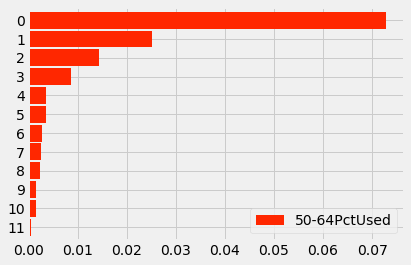

In [8]:
fakedata3.sort_index(ascending=False).plot.barh(color="#FF2700", width=0.9);

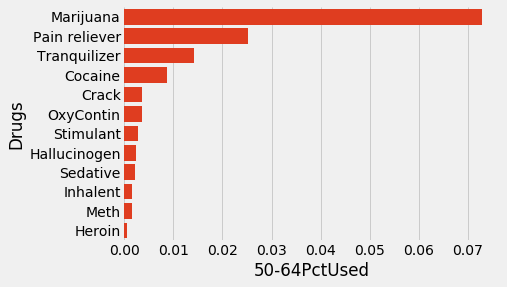

In [13]:
sns.set_color_codes("deep")
sns.barplot(x="50-64PctUsed", y="Drugs", data=fakedata3, 
            label="50-64PctUsed", color="#FF2700");
sns.despine(left=True, bottom=True)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here